## Final Project Submission

Please fill out:
* Student name: Lisa Arends
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL: https://wordpress.com/post/fromteachingtotech928923879.wordpress.com/312


# What Types of Movies Should Be Made in Order to Maximize Profits?

This project centers on using data to make recommendations to Microsoft for their new movie-making venture. In order to make these suggestions, I will examine data about movie profits, expenses and characteristics in order to look for trends and associations. Finally, this will be used to make specific data-driven suggestions for the company.

## Problem Statement

What types of movies should Microsoft Movie Studios make in order to maximize the return on investment?


## Business Value

A significant amount of time and money goes into the production of a movie. These resources are best allocated to the movie genres, crew and markets that are associated with a greater return on investment (ROI) in terms of box-office revenue. By focusing on creating and releasing movies that have a greater chance of being financially successful, Microsoft Movie Studios can maximize profits. 


## Questions to consider
- Which movie genres have the highest ROI?
- What movie runtimes are associated with high ROI?
- Do movies released at a certain time of year have a higher ROI?
- What directors and producers have demonstrated profitability?
- Do movies that are part of a franchise have a higher gross?
- What external markets can increase profits?

# What do the data tell us about movie profits?

### Data Mining

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline


Because my focus is on what makes a movie profitable, I will begin by examining data that contains information about the gross profits and the production budgets for movies from 1915 until 2020. 

In [2]:
# Import and inspect the budget csv
budget = pd.read_csv('Data/tn.movie_budgets.csv.gz')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Data Cleaning

The budget dataframe has 5782 non-null values. The dollar amounts are currently
formatted as objects. In order to work with those values, they will be converted
into integers.

In [4]:
#function to be used to change the formatting for the money columns
def clean_money(money):
    money = money.replace(',','')
    return int(money[1:])


In [5]:
#Apply the function to the appropriate columns
budget['production_budget'] = budget['production_budget'].apply(clean_money)
budget['domestic_gross'] = budget['domestic_gross'].apply(clean_money)
budget['worldwide_gross'] = budget['worldwide_gross'].apply(clean_money)


In [6]:
#Change the release date to datetime and extract the month and year
budget['release_date'] = pd.to_datetime(budget['release_date'])
budget['release_year'] = budget['release_date'].dt.year
budget['release_month'] = budget['release_date'].dt.month


### Data Exploration

In [7]:
#Look at the dataframe values
budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,release_month
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,7.050675
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,3.480147
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,4.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,7.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,10.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,12.000000


There are no movies with a budget of zero dollars, but there are movies with a profit of zero dollars.  Because we are looking for profitable movies, the rows with no profit will be dropped. The release years span from 1915 to 2020, which seems reasonable. 

In [8]:
#Select only the rows that contain movies that have earned a gross profit.
budget = budget[budget['worldwide_gross'] != 0]

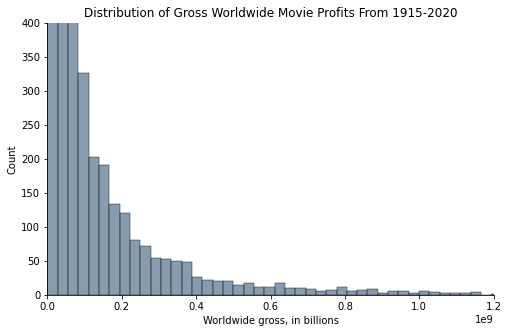

In [9]:
#plot the distribution of worldwide profits
fig,ax = plt.subplots(figsize=(8,5))
sns.histplot(data=budget['worldwide_gross'], bins=100, color='#5f7d95')
ax.set(ylim=(0,400),
        xlim=(0,1200000000),
        title='Distribution of Gross Worldwide Movie Profits From 1915-2020',
        xlabel='Worldwide gross, in billions')
sns.despine(fig=fig,top=True, right=True);


The worldwide gross profits are skewed right, with most movies earning under $200,000,000. It is important to note that these figures have not been adjusted for inflation and since the data includes movies as far back as 1915, this data is somewhat misleading.

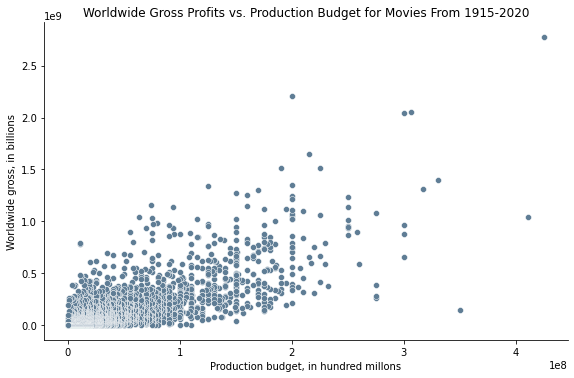

In [10]:
#plot the correlation between worldwide profits and production budget
fig, ax = plt.subplots(figsize=(8,5))
plt.tight_layout()
sns.scatterplot(data=budget, x='production_budget', y='worldwide_gross', color='#5f7d95')
ax.set(title='Worldwide Gross Profits vs. Production Budget for Movies From 1915-2020',
    xlabel='Production budget, in hundred millons',
    ylabel='Worldwide gross, in billions')
sns.despine(fig=fig,top=True,right=True);

In [11]:
#calculate correlation coefficient for production budget and worldwide gross
budget['production_budget'].corr(budget['worldwide_gross'])

0.7460130477427726

There is a moderate positive correlation (r = 0.79) between the worldwide gross profits of a movie and its production budget. In general, the movies that earned the most profit also cost the most to make, potentially lowering the net profits. 

In order to determine which movies are the most profitable, the ROI will be determined. Movie studios are notoriously opaque about the actual costs of a movie's production, but the data in the budget table will at least give an estimation of the ratio between profit and cost. I am only considering the worldwide gross for the ROI, since it includes all box office revenues. 

In [12]:
#Create an ROI column
budget['roi'] = (budget['worldwide_gross']/budget['production_budget'])*100
budget['roi'].median()

188.49211384615384

I am going to limit the dataframe to only movies made in on or after 2010, since the factors that made movies profitable before then may no longer be relevant. 

In [13]:
#Limit to only movies made >= 2010
budget = budget[budget['release_year'] >= 2010]

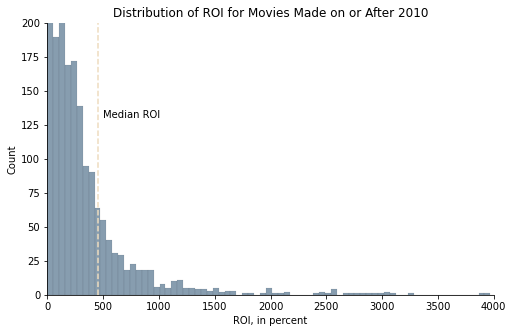

In [14]:
#plot distribution of ROI for movies made on or after 2010
fig,ax = plt.subplots(figsize=(8,5))
sns.histplot(data=budget, x='roi', color='#5f7d95')
ax.set(xlim=(0,4000),
    ylim=(0,200),
    title='Distribution of ROI for Movies Made on or After 2010',
    xlabel='ROI, in percent')
sns.despine(fig=fig,top=True,right=True)
ax.axvline(budget['roi'].quantile(q=.8),color='#eedcbe').set_linestyle('--')
ax.text(500,130,'Median ROI');


In [15]:
#Inspect the top movies by ROI
budget.sort_values('roi', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,2015,7,41656.474000
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,2012,1,10175.949000
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,2011,4,6658.059067
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,2015,4,6436.419800
4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,2010,10,5917.067733


Just as with worldwide gross, the ROI data is also skewed right, with a median value of around 2 (200% ROI) and a maximum of an impressive 417 (41,700% ROI).

In [16]:
#Examine the ROI data
budget['roi'].describe()

count     1922.000000
mean       366.476915
std       1115.385695
min          0.002600
25%         66.858717
50%        202.257614
75%        396.318542
max      41656.474000
Name: roi, dtype: float64

There is significant variability in the ROI data, with a mean of 3.7 and a standard deviation of 11.2. The top half of performers have an ROI of 2 or higher, indicating that they roughly double their investment. 

# What are the characteristics of the movies with a high ROI?

Now we know which movies have been the most profitable in the last ten years, but we don't have much information about them. In order to rectify this, I will be joining this dataframe with one that contains the genre and the runtimes for the movies. 

## What movie genres have the highest ROI?

### Data Mining

In [17]:
#Import and inspect the csv with movie genres and runtimes
imdb_title = pd.read_csv('Data/imdb.title.basics.csv')
imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
imdb_title.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


### Data Cleaning

The years range from 2010 to 2115, the later of which is obviously an error.

In [19]:
#This dataframe contains duplicate titles. These need to be addressed before merging.
imdb_title['primary_title'].nunique()

136071

In [20]:
imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [21]:
#Inspect the duplicates.
imdb_title[imdb_title.duplicated('primary_title')]
imdb_title[imdb_title['primary_title'] == 'The Rehearsal']


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
99621,tt5820812,The Rehearsal,The Rehearsal,2016,102.0,Drama
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama


Some of the duplicates appear to be actual copies, while others refer to different movies with the same titles. In order to limit the number of movie titles to consider, I am going to restrict the dataframe to only movies made on or before 2020 (the latest in the top_20 dataframe) as well as movies that do not have null values.

In [22]:
#Drop null values and limit to movies released <= 2020
imdb_title = imdb_title[imdb_title['start_year'] <= 2020]
imdb_title = imdb_title.dropna(axis = 0)

In [23]:
#Check for duplicate titles
imdb_title['primary_title'].nunique()

105471

There are still a significant number of duplicate titles. To reduce these further, I will do an inner merge with the budget dataframe so that I only need to address the titles that are contained in that dataset.

In [24]:
#Merge the two dataframes on their respective titles.
movies = pd.merge(budget, imdb_title, how = 'inner', left_on = 'movie', right_on = 'primary_title')


Since the left dataframe had fewer rows than the resulting join, we know that there are still duplicated titles. Some of these will be due to two or more different movies that share a title. Because we want the movies based on ROI, I will drop the columns where the release year on the right does not match the start year on the left.

In [25]:
#Only keep the rows where the release dates match
movies = movies.loc[movies['release_year'] == movies['start_year']]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 2118
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1407 non-null   int64         
 1   release_date       1407 non-null   datetime64[ns]
 2   movie              1407 non-null   object        
 3   production_budget  1407 non-null   int64         
 4   domestic_gross     1407 non-null   int64         
 5   worldwide_gross    1407 non-null   int64         
 6   release_year       1407 non-null   int64         
 7   release_month      1407 non-null   int64         
 8   roi                1407 non-null   float64       
 9   tconst             1407 non-null   object        
 10  primary_title      1407 non-null   object        
 11  original_title     1407 non-null   object        
 12  start_year         1407 non-null   int64         
 13  runtime_minutes    1407 non-null   float64       
 14  genres  

In [26]:
#check for duplicated titles
movies['primary_title'].nunique()

1362

We are left with data on 1407 movies with 45 duplicated titles.

In [27]:
#Inspect the duplicates
movies[movies.duplicated('primary_title')].iloc[:5]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
32,9,2018-11-21,Robin Hood,99000000,30824628,84747441,2018,11,85.603476,tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller"
42,51,2010-03-05,Alice in Wonderland,200000000,334191110,1025491110,2010,3,512.745555,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,99.0,"Fantasy,Musical"
87,2,2017-11-22,Coco,175000000,209726015,798008101,2017,11,456.004629,tt7002100,Coco,Coco,2017,98.0,Horror
184,44,2015-03-27,Home,130000000,177397510,385997896,2015,3,296.921458,tt5121236,Home,Home,2015,15.0,Documentary
186,44,2015-03-27,Home,130000000,177397510,385997896,2015,3,296.921458,tt5775862,Home,Innocent,2015,4.0,Drama


In [28]:
movies[movies['primary_title'] == 'Alice in Wonderland'].iloc[0]

id                                         51
release_date              2010-03-05 00:00:00
movie                     Alice in Wonderland
production_budget                   200000000
domestic_gross                      334191110
worldwide_gross                    1025491110
release_year                             2010
release_month                               3
roi                                   512.746
tconst                              tt1014759
primary_title             Alice in Wonderland
original_title            Alice in Wonderland
start_year                               2010
runtime_minutes                           108
genres               Adventure,Family,Fantasy
Name: 40, dtype: object

In [29]:
movies[movies['primary_title'] == 'Alice in Wonderland'].iloc[1]

id                                    51
release_date         2010-03-05 00:00:00
movie                Alice in Wonderland
production_budget              200000000
domestic_gross                 334191110
worldwide_gross               1025491110
release_year                        2010
release_month                          3
roi                              512.746
tconst                         tt2049386
primary_title        Alice in Wonderland
original_title       Alice in Wonderland
start_year                          2010
runtime_minutes                       99
genres                   Fantasy,Musical
Name: 42, dtype: object

These all appear to indeed be different movies that happen to share a title. Because we do not know which movie is associated with the high ROI, I will drop these rows. 

In [30]:
#Drop the rows with duplicated titles
movies = movies[movies.duplicated('primary_title') == False].reset_index(drop = True)

I am only going to consider the ROI, release month and year, runtime and genres. The imdb id of tconst will be maintained in order to match with other imdb data, bu the id from the original budget table is no longer useful. Unneeded columns will be dropped.

In [31]:
#Drop unneeded columns
movies = movies.drop(labels = ['id','release_date','primary_title', 'original_title'], axis = 1)

### Data Exploration

In order to better understand which genres are the most profitable, two dictionaries will be built: one with genres and the number of movies released per year in that category and another that has the median ROI for each genre. The median will be used (opposed to the mean) because of the presence of outliers. 

In is important to note the most movies in the database list more than one genre. Since this is overlapping, movies will be counted more than once in the following genre calculations. 

In [32]:
#Generate the lists of years and genres
years = sorted(movies['release_year'].unique())

genres = (
        ['Action', 'Adventure','Fantasy','Sci-Fi', 'Thriller','Western',
         'Animation', 'Comedy','Crime','War','Documentary','Musical',
        'Family','Horror','Drama','Biography','Mystery','History','Sport',
        'Romance']
)

#Create the empty dictionaries
genre_counts = {}
genre_roi = {}


#Loop over each genre and create a df for that genre and find median ROI
for genre in genres:
    
    count_list = []
    genre_df = movies[movies['genres'].str.contains(genre)]
    genre_roi[genre] = genre_df['roi'].median()

    #Loop over each year and find the number of time the genre occured
    for year in years:
        
        year_df = genre_df[genre_df['release_year'] == year]
        count_list.append(year_df.shape[0])
    
    genre_counts[genre] = count_list


In [33]:
#create a dataframe from the genres and median ROI values
genre_roi_df = pd.DataFrame(genre_roi.items())
genre_roi_df.columns = ['genre','median_roi']
genre_roi_df  = genre_roi_df.sort_values('median_roi', ascending = False)

#create a list of the top five genres based on ROI
top_genre_roi = list(genre_roi_df['genre'][:5])



### Data Visualization

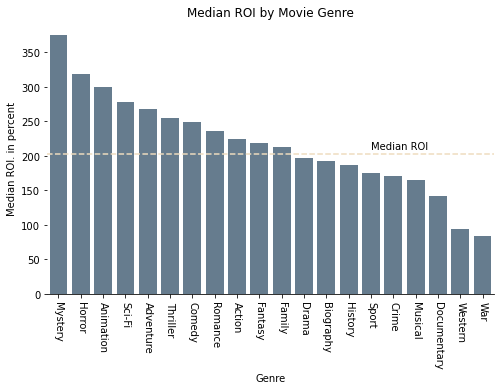

In [34]:
#plot the median ROI for each genre
fig, ax = plt.subplots(figsize =(8,5))



sns.barplot(data = genre_roi_df, x = 'genre', y = 'median_roi', color = '#5f7d95')
ax.axhline(budget['roi'].median(), color='#eedcbe').set_linestyle('--')
ax.set_xticklabels(labels=genre_roi_df['genre'], rotation=270)
ax.set(title = 'Median ROI by Movie Genre',
    xlabel='Genre',
    ylabel='Median ROI. in percent')
sns.despine(fig=fig,top=True, left=True)
ax.text(14, 210, 'Median ROI');

<ipython-input-35-03017f1761e3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=genre_roi_df['genre'], rotation=270)


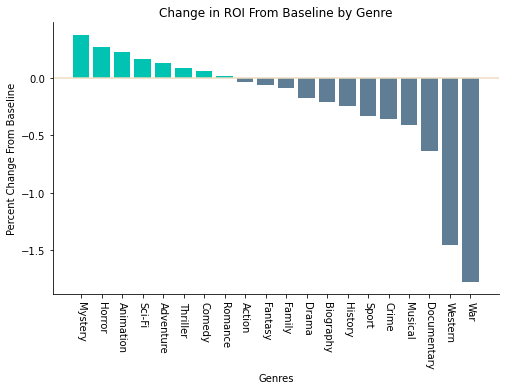

In [35]:
genre_roi_df['change_from_baseline'] = (genre_roi_df['median_roi']-movies['roi'].median())/genre_roi_df['median_roi']
genre_roi_df.reset_index()




c = ['#5f7d95' if v <= 0 else '#00c3b1' for v in genre_roi_df['change_from_baseline']]
fig,ax = plt.subplots(figsize=(8,5))
ax.bar(x=genre_roi_df['genre'], height=genre_roi_df['change_from_baseline'], color=c)
ax.axhline(0, color='#eedcbe')
ax.set_xticklabels(labels=genre_roi_df['genre'], rotation=270)
ax.set(title='Change in ROI From Baseline by Genre',
      xlabel='Genres',
      ylabel='Percent Change From Baseline')

sns.despine(fig=fig,top=True, right=True);


In [36]:
genre_roi_df

,genre,median_roi,change_from_baseline
16,Mystery,374.327227,0.379908
13,Horror,318.562527,0.271360
6,Animation,299.854564,0.225901
3,Sci-Fi,277.831032,0.164538
1,Adventure,267.750157,0.133083
4,Thriller,254.116670,0.086572
7,Comedy,248.540313,0.066078
19,Romance,236.448873,0.018320
0,Action,223.577303,-0.038197
2,Fantasy,218.465204,-0.062491


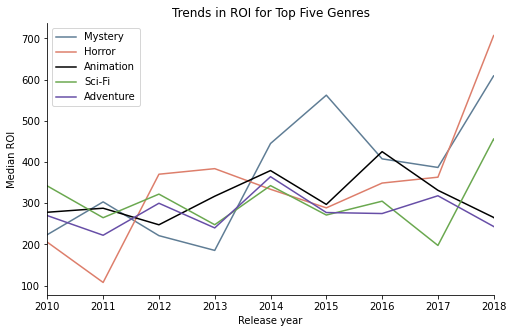

In [37]:
p = {'Mystery':'#5f7d95','Horror':'#dd7e6b','Animation':'#000000','Sci-Fi':'#6aa84f','Adventure':'#674ea7'}

#plot change in median ROI over time for top 5 genres
fig,ax = plt.subplots(figsize =(8,5))
legend = []
for genre in top_genre_roi:
    legend.append(genre)
    df = movies[movies['genres'].str.contains(genre)]
    genre_time = df.groupby('release_year')['roi'].median().reset_index()
    sns.lineplot(data=genre_time, x='release_year', y='roi', color=p[genre])
    
sns.despine(fig=fig,top=True)
ax.set(xlim = (2010,2018),
      title = 'Trends in ROI for Top Five Genres',
      xlabel='Release year',
      ylabel='Median ROI')
ax.legend(legend);

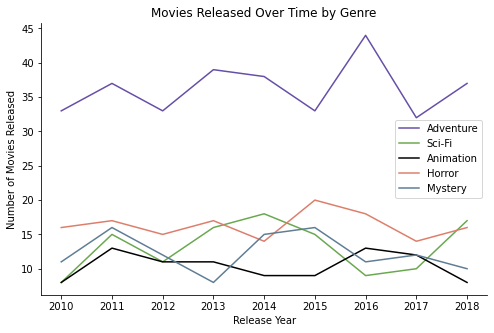

In [38]:
fig,ax = plt.subplots(figsize =(8,5))
sns.despine(fig=fig,top=True)
legend = []
for genre, counts in genre_counts.items():
    if genre in top_genre_roi:
        legend.append(genre)
        y = counts
        sns.lineplot(x = years[:-1], y = y[:-1], color=p[genre])
ax.set(title = 'Movies Released Over Time by Genre',
      xlabel='Release Year',
      ylabel='Number of Movies Released')
ax.legend(legend);

        

In the two graphs above, the data for 2019 was not plotted because it appeared to be incomplete, leading to erroneous conclusions. 

<ipython-input-39-4de616722ecd>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = median_cost_per_genre_df['genre'], rotation=270)


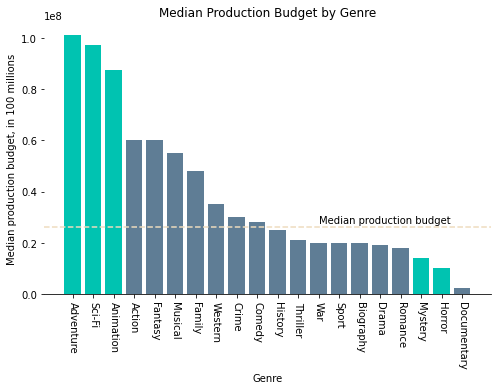

In [39]:
#In order to assist with genre recommendations, the median production budget per genre is calculated

median_cost_per_genre = {}
for genre in genres:
    df = movies[movies['genres'].str.contains(genre)]
    median_cost_per_genre[genre] = df['production_budget'].median()
median_cost_per_genre_df = pd.DataFrame(median_cost_per_genre.items())
median_cost_per_genre_df.columns = ['genre', 'median_cost']  
median_cost_per_genre_df = median_cost_per_genre_df.sort_values('median_cost', ascending = False)
    

co = ['#00c3b1' if v in ['Adventure','Mystery','Horror','Animation','Sci-Fi'] else '#5f7d95' for v in median_cost_per_genre_df['genre']]  
fig,ax = plt.subplots(figsize=(8,5))
sns.despine(fig=fig,top=True, left=True)
ax.bar(median_cost_per_genre_df['genre'], height=median_cost_per_genre_df['median_cost'], color=co)
ax.set_xticklabels(labels = median_cost_per_genre_df['genre'], rotation=270)
ax.axhline(movies['production_budget'].median(), color='#eedcbe').set_linestyle('--')
ax.set(
    title='Median Production Budget by Genre',
    xlabel='Genre',
    ylabel='Median production budget, in 100 millions')
ax.text(12,27700000,'Median production budget');

Adventure movies are by far the most popular, with about double the number released each year compared to the other top genres. This genre has a consistent ROI of around 250%, which is about average. However, they are also the most expensive to produce, which introduces an element of risk. 

Mystery has a 38% improvement on ROI, but popularity trends suggest that it may be losing interest for viewers.

Horror and science fiction have a high ROI (27% and 16% improvements, respectively) and seem to be increasing in both popularity and profitability. Science fiction is expensive to create, while horror has extremely low production costs. 

Animation is a consistent performer (about 23% improvement on baseline ROI), but is also expensive to produce.

### Recommendation - Focus production on movies that fall into the adventure, horror and science fiction genres. When wanting to limit production budget, produce horror movies. 

## What runtimes are associated with a higher ROI?

### Data Visualization

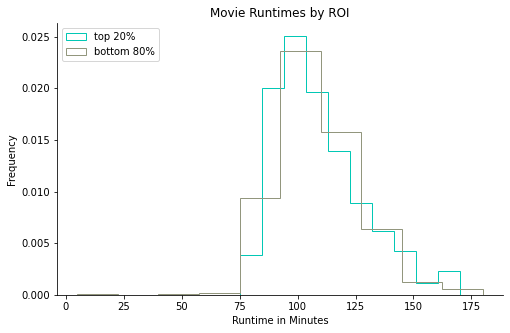

In [40]:
#add a boolean column 'top_roi' to indicate if a movie is in the top 20% for ROI
split = movies['roi'].quantile(q=0.8)

movies['top_roi'] = movies['roi'] >= split

#plot the runtimes for movies in the top 20% and bottom 80%
top = movies[movies['roi'] >= split]
bottom = movies[movies['roi'] < split]

fig,ax = plt.subplots(figsize=(8,5))
ax.hist(
    x=top['runtime_minutes'], 
    density=True, 
    color='#02c8b5', 
    histtype='step'
)
ax.hist(
    x=bottom['runtime_minutes'], 
    density=True, 
    color='#92967d', 
    histtype='step'
)
ax.legend(['top 20%','bottom 80%'])
ax.set(
    title='Movie Runtimes by ROI',
    xlabel='Runtime in Minutes',
    ylabel='Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);



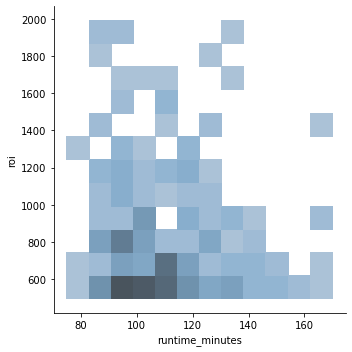

In [41]:
#filter movies to only top 20% of ROI while removing outliers in ROI
filtered_movies = movies[(movies['top_roi'] == True) & (movies['roi'] <= 2000)]

#plot runtimes and ROI
sns.displot(
    data=filtered_movies , 
    x="runtime_minutes", 
    y="roi", 
    color='#5f7d95'
);

Regardless of ROI, movies generally run between 80 and 120 minutes. When only looking at the top 20% of movies in terms of ROI, the shorter movies (110 minutes and under) appear to have a slight association with a higher ROI, although some of this is due to outliers in the data. The worst performing movies in terms of ROI are between 140 and 150 minutes. Overall, there is not enough of a difference between the top-performing movies and the lower-performing movies to make a recommendation for runtimes in terms of increase in ROI.

## How does the timing of the movie release correlate with ROI?

### Data Exploration

In [42]:
#create column to show season of release

def season(month):
    if month in [6,7,8]:
        return 'summer' 
    elif month in [9,10,11]:
        return 'fall' 
    elif month in [12,1,2]:
        return 'winter'
    else:
        return 'spring'
    
movies['season'] = movies['release_month'].apply(season)

      

In [43]:
#caluclate the mean ROI for each season
roi_season = movies.groupby('season')['roi'].mean().reset_index()
roi_season = roi_season.sort_values('roi')

### Data Visualization

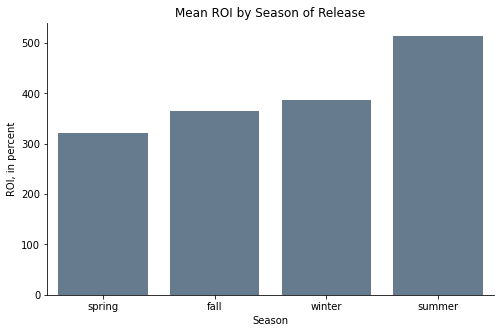

In [44]:
#plot the mean ROI for each season
fig,ax = plt.subplots(figsize=(8,5))
sns.barplot(data = roi_season, x='season', y='roi', color='#5f7d95')
ax.set(
    title='Mean ROI by Season of Release',
    xlabel='Season',
    ylabel='ROI, in percent'
    )
sns.despine(top=True, right=True);

The movies with the highest ROI are released in in the summer, with the three other seasons being approximately equal, giving credence to the idea of a "summer blockbuster." Next, I will check if the ROI by season of release varies by genre for the movies in the top 20% of ROI.

In [ ]:
#select only the movies in the top 20% of ROI
top_titles = movies[movies['top_roi'] == True]

#plot each genre
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12,8), sharey=True)
plt.subplots_adjust(top=2, hspace=1)
sns.despine(top=True, right=True, left=True)

for n, ax in enumerate(axes.flatten()):
    genre = genres[n]
    df = top_titles[top_titles['genres'].str.contains(genre)]
    by_season = df.groupby('season')['roi'].median().reset_index()
    by_season = by_season.sort_values('season')
    ax.bar(x=by_season['season'], height=by_season['roi'], color='#5f7d95')
    ax.set_title(genre)
    ax.set(ylabel='ROI, in percent')
    ax.set_xticklabels(by_season['season'], rotation=30, ha='right');


Overall, summer releases have the highest ROI. However, Horror has the highest ROI in the fall, thrillers and biography do best in the winter. Fantasy peaks in the summer and winter. Action, adventure and comedy are generally consistent throughout the year. 

### Recommendation - Focus on summer releases, especially for big-budget movies, such as those in the adventure genre. Plan to release horror films in the fall and science fiction in the winter, when they have the highest ROI.

## Which producers and directors are associated with movies with a high ROI?

We all know that the "big name" actors tend to draw a crowd, but they also draw a big paycheck. I am going to look instead at the directors and producers that have been linked to highly profitable movies. 

This will require merging 3 dataframes: one with information linking crew ids to movie ids, one that connects the crew ids to names and then the existing top_titles dataframe, which contains informaiton about the movies in the top 20% for ROI. 

### Data Mining

In [ ]:
#load the csv with information about crew
principals = pd.read_csv('Data/imdb.title.principals.csv')

#create two dataframes to separate out only the directors and producers
directors = principals.loc[principals['category'] == 'director']
producers = principals.loc[principals['category'] == 'producer']


In [ ]:
#load the csv with the names of the crew
names = pd.read_csv('Data/imdb.name.basics.csv')

### Data Cleaning

In [ ]:
#create a function to merge the dataframes
def top_names(df, top_titles):
    name = df['category'].iloc[0]
    df = df.merge(names, how = 'inner', left_on = 'nconst', right_on = 'nconst')
    df = df[['tconst', 'primary_name', 'nconst']]
    top_titles = top_titles.merge(df, how = 'inner', left_on = 'tconst', right_on = 'tconst')
    top_titles = top_titles.rename(columns = {'primary_name': name})
    return top_titles


In [ ]:
#merge the dataframes and drop extra columns
top_titles = top_names(directors, top_titles)
top_titles = top_names(producers, top_titles)
top_titles = top_titles.drop(columns = ['nconst_x', 'nconst_y'])

### Data Exploration

In [ ]:
#calculate the mean ROI for each director
roi_director = top_titles.groupby('director')['roi'].mean().reset_index()
roi_director = roi_director.sort_values('roi', ascending = False).reset_index()


Because top directors can also influence people to watch a movie, I will find the total number of movies each director has worked on.  

In [ ]:
#calculate the total number of movies made by each director
top_director = top_titles.groupby('director')['tconst'].count().reset_index()
top_director = top_director.sort_values('tconst', ascending = False).reset_index(drop = True)

### Data Visualization

In [ ]:
#plot the top 20 directors by ROI
names = roi_director['director'][:20]
colors = ['#02c8b5' if name in ['Jordan Peele','William Brent Bell'] else '#5f7d95' for name in names]

fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data = roi_director[:20], x = names, y = 'roi', palette=colors)
ax.set_xticklabels(labels=names, rotation=270)
ax.set(
    title='The 20 Most Profitable Directors',
    xlabel='Directors',
    ylabel='ROI, in percent')
sns.despine(top=True, right=True);

In [ ]:
#plot the top 20 directors by number of movies
names2 = top_director['director'][:20]
colors = ['#02c8b5' if name in ['Jordan Peele','William Brent Bell'] else '#5f7d95' for name in names2]


fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=top_director[:20], x = names2, y = 'tconst', palette=colors)
ax.set_xticklabels(labels=names2, rotation=270)
ax.set(
    title='Top 20 Most Prolific Directors',
    xlabel='Directors',
    ylabel='Number of Movies Directed')
sns.despine(top=True, right=True);

The two directors with the extremely high ROI both worked on The Gallows, a very low-budget horror movie that happened to do extremely well at the box office. This type of return cannot be expected again.

Jordan Peele and William Brent Bell are both prolific and profitable, making them wise choices for movie production.

Unlike with actors or directors, people don't tend to watch a movie based on its producer. However, the producer can a have a large role in helping to keep a movie within budget. Next, I will look for the most profitable producers. 

In [ ]:
#calcuate the mean ROI by producers
roi_producer = top_titles.groupby('producer')['roi'].mean().reset_index()
roi_producer = roi_producer.sort_values('roi', ascending = False)

In [ ]:
#plot the mean roi for the top 20 producers
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=roi_producer[:20], x='producer', y='roi', color='#5f7d95')
ax.set_xticklabels(labels=roi_producer['producer'][:20], rotation=270)
ax.set(
    title='The 20 Most Profitable Producers',
    xlabel='Producers',
    ylabel='Mean ROI, im percent')
sns.despine(right=True, top=True);

There are three standouts here: Dean Schnider, Guymon Casady and Benjamin Forkner.

### Recommendation - Create opportunities to hire Jordan Peele or William Brent Bell as directors and Dean Schnider, Guymon Casady or Benjamin Forkner as producers. 

## How do movie franchises impact gross revenue?

By observation, it is clear that the many of the movies with the highest gross revenue are part of a franchise. Next, I'm going to look at the association between franchise membership and gross revenue. Because none of the provided datasets contain information about franchises, I will use a Wikipedia page to obtain a list of movies titles that are a part of a franchise. Then, I will use that data to create a Boolean column in the top_titles dataframe to indicate if each movie is part of a franchise. 

### Data Mining

In [ ]:
#load the table from Wikipedia
wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_highest-grossing_films#Highest-grossing_franchises_and_film_series')
franchises = wiki[4].iloc[8:]
franchises = franchises[1].reset_index(drop=True)

### Data Cleaning

In [ ]:
#create a function to get only the names from the table
def clean_title(title):
    if '(' not in title:
        return None
    elif '$' in title:
        return None
    else:
        return title.split(' (')[0]

In [ ]:
#apply the function
franchises = franchises.apply(clean_title)

In [ ]:
#create a list of franchises and update the list with some missing titles
franchise_list = franchises.to_list()
franchise_list = [n for n in franchise_list if n != None]
franchise_list.extend(['Paranormal Activity 3', 'The Hunger Games: Mockingjay - Part 1',
                       'The Hunger Games: Catching Fire','Annabelle', 'Furious',
                       'Transformers: Dark of the Moon', 'Transformers: Age of Extinction', 
                       'Jurassic World: Fallen Kingdom', 'Incredibles 2', 'Rise of the Planet of the Apes',
                       'Ice Age: Continental Drift', 'The Hangover Part II', 'The Twilight Saga: Eclipse',
                       'Hotel Transylvania 3: Summer Vacation', 'Hotel Transylvania 2', 'Fifty Shades Darker',
                       'Fifty Shades Freed', 'Fifty Shades of Grey','Resident Evil: Afterlife'])

In [ ]:
#create a function to determine if a movie is a franchise
def is_franchise(movie):
    return movie in franchise_list

In [ ]:
#apply the function on the top_titles dataframe
top_titles['franchise'] = top_titles['movie'].apply(is_franchise)

### Data Visualization

In [ ]:
fig = px.scatter(top_titles, 
                 x="production_budget", 
                 y="worldwide_gross", 
                 color='franchise',
                 hover_name="movie", 
                 hover_data=["roi"],
                 title='Do Franchises Make More Money?',
                 color_discrete_sequence=['#02c8b5','#5f7d95'])
                
               
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')




### Recommendation - Look for opportunities for movie franchises, especially for big-budget productions.

## What world markets watch the most American-made movies?

One of the ways that a movie can make more profit is by exporting it to other markets with slight modifications. I am going to examine the top markets for American-made movies for films in the top 20% of ROI.

### Data Mining

In [ ]:
#load the dataset
regions = pd.read_csv('Data/imdb.title.akas.csv')

### Data Cleaning

In [ ]:
#Get the count of movie titles by region

top_ids = list(top_titles['tconst'])

def is_top_region(id_):
    return id_ in top_ids

top_regions = regions[regions['title_id'].apply(is_top_region)]
num_by_region = top_regions.groupby('region')['title_id'].count().reset_index()
num_by_region = num_by_region.sort_values('title_id', ascending = False)
num_by_region = num_by_region.rename(columns = {'title_id':'count'})

This file uses ISO-2 coding for the countries. This will need to be updated to ISO-3 in order to make a choropleth graph. I found a website with a table with both code formats. I will use this to make a mapping dictionary. 

In [ ]:
#create a mapping dictonary to update codes
codes = pd.read_csv('Data/countries-codes.csv', sep = ';')
iso_3 = codes.loc[:,['ISO2 CODE', 'ISO3 CODE']]
iso_3 = iso_3.set_index('ISO2 CODE')['ISO3 CODE'].to_dict()

In [ ]:
#apply the dictionary
num_by_region['region'] = num_by_region['region'].replace(iso_3)

### Data Visualization

In [ ]:
#map the number of American-made movies exported by region
px.choropleth(data_frame=num_by_region, 
              locations='region', 
              color='count',
              color_continuous_scale='Teal',
              title='Top Markets for American-Made Movies')

### Recommendation - Customize high-performing movies for the following global markets: Brazil, Russia, Germany and Spain.

# Conclusions
## Recommendations

- Focus production on movies that fall into the adventure, horror and science fiction genres because those are both popular and profitable. When wanting to limit production budget, produce horror movies, since they have some of the lowest budgets with a high rate of return.

- Focus on summer releases, especially for big-budget movies, as summer films have the highest rate of return. Plan to release horror films in the fall and science fiction in the winter, as the ROI for those genres peak at those times.

- Create opportunities to hire Jordan Peele or William Brent Bell as directors, since they are both prolific and have a track record of creating profitable movies. Likewise, consider hiring  Dean Schnider, Guymon Casady or Benjamin Forkner as producers, since they have created highly-profitable movies in the past.

- Look for opportunities for movie franchises, especially for big-budget productions, because movies that are part of a franchise are generally more profitable than stand-alone movies. This is especially true for movies with high production budgets.

- Customize high-performing movies for the following global markets: Brazil, Russia, Germany and Spain because they consume the most American-made movies and can help increase global sales. 

# Future Work
- Streaming has become increasing popular and has dramatically altered the movie environment. Further research into streaming markets to determine what movies are most profitable in that domain would be highly beneficial. 

- Examine data from 2020-2021 to see the impact that Covid had on movie trends, as some of these may have a lasting impact on the market.

- Obtain more thorough data on the expenses in movie production in order to calculate more accurate ROI statistics. 